In [19]:
# 売上データの前処理・可視化・簡易分析

In [20]:
# ライブラリ読み込み
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Meiryo']

In [21]:
# データ読み込み
df = pd.read_csv("../data/sales.csv")
df.head()

,date,sales,ad_cost,category
0,2024/1/1,12000,3000,A
1,2024/1/2,15000,3500,A
2,2024/1/3,18000,4000,B
3,2024/1/4,17000,3800,B
4,2024/1/5,20000,4200,A


In [22]:
# 前処理

In [23]:
# 欠損値確認
df.isnull().sum()

date        0
sales       0
ad_cost     0
category    0
dtype: int64

In [24]:
# 日付型に変換
df["date"] = pd.to_datetime(df["date"])

In [25]:
# 月別売上の集計
monthly = df.groupby(df["date"].dt.to_period("M"))["sales"].sum()
monthly

date
2024-01     82000
2024-02    125000
2024-03    161000
Freq: M, Name: sales, dtype: int64

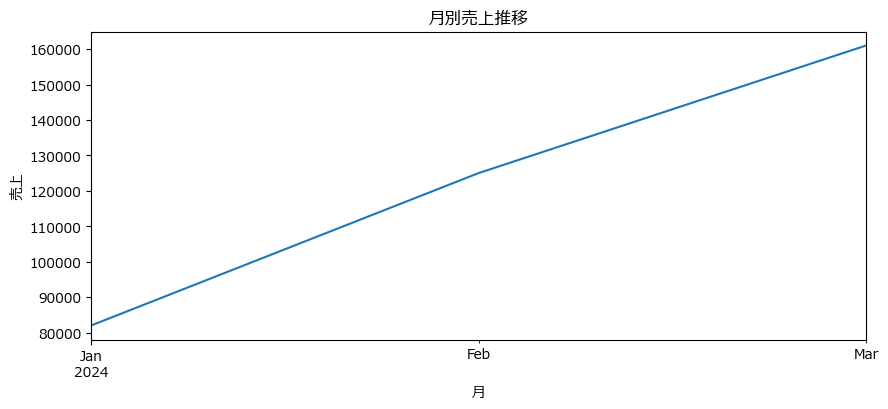

In [26]:
# 可視化
plt.figure(figsize=(10, 4))
monthly.plot(kind="line")
plt.title("月別売上推移")
plt.ylabel("売上")
plt.xlabel("月")
plt.savefig("../output/monthly_sales.png")
plt.show()

In [27]:
# 相関分析
df[["sales", "ad_cost"]].corr()

,sales,ad_cost
sales,1.000000,0.998665
ad_cost,0.998665,1.000000


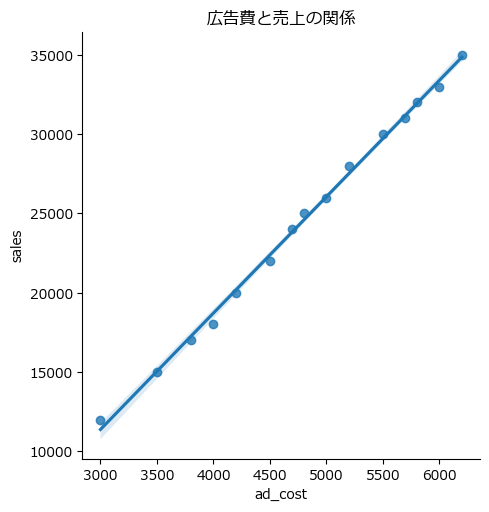

In [28]:
# 散布図＋回帰直線
sns.lmplot(x="ad_cost", y="sales", data=df)
plt.title("広告費と売上の関係")
plt.savefig("../output/regression.png")
plt.show()

In [29]:
## 分析結果まとめ

- 売上は◯月にピークがある  
- 広告費と売上には正の相関が見られる  
- 今後は顧客属性データを組み合わせることで、より詳細な分析が可能  

SyntaxError: invalid character '◯' (U+25EF) (2394392672.py, line 3)